 SVM (Linear Kernel) Accuracy: 0.9000
 SVM (RBF Kernel) Accuracy: 0.9333


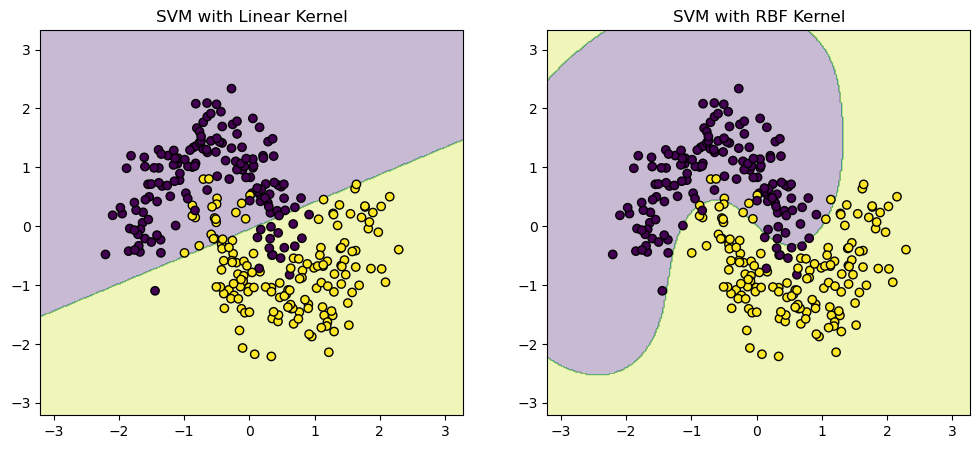

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f" SVM (Linear Kernel) Accuracy: {accuracy_linear:.4f}")
print(f" SVM (RBF Kernel) Accuracy: {accuracy_rbf:.4f}")

def plot_decision_boundary(model, X, y, title):
    h = 0.02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")
plt.show()
